***Utkarsh Sharma AI LAB***

***Here are the steps to train a basic autoencoder on the Fashion MNIST dataset:***

***Load the Fashion MNIST dataset and preprocess the data, such as normalizing the pixel values.
Define the architecture of the autoencoder. A typical architecture would consist of an encoder followed by a decoder. The encoder will reduce the input to a lower-dimensional representation (latent code), and the decoder will then reconstruct the original image from the latent code.
Compile the model by specifying the optimizer, loss function, and metrics to track during training.
Train the model on the Fashion MNIST data by specifying the number of epochs and batch size.
Evaluate the model on a validation set to ensure that it is capable of reconstructing images accurately.
Finally, use the trained model to reconstruct images from the test set and visually inspect the results to verify that the autoencoder has learned a meaningful representation of the data.***

In [ ]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# Create the encoder
encoding_dim = 64
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation="relu")(input_img)

In [ ]:
# Create the decoder
decoded = layers.Dense(784, activation="sigmoid")(encoded)

In [ ]:
# Create the autoencoder
autoencoder = keras.Model(input_img, decoded)

In [ ]:
autoencoder.compile(optimizer="adam", loss="mse")

In [ ]:
# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0525 - val_loss: 0.0285
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0238 - val_loss: 0.0206
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0180 - val_loss: 0.0161
Epoch 4/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0148 - val_loss: 0.0140
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0132 - val_loss: 0.0127
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0122 - val_loss: 0.0119
Epoch 7/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0115 - val_loss: 0.0113
Epoch 8/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0110 - val_loss: 0.0109
Epoch 9/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0106 - val_loss: 0.0105
Epoch 10/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0103 - val_loss: 0.010

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)


313/313 [==============================] - 1s 2ms/step


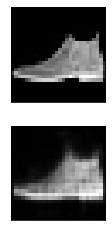

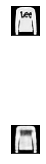

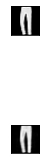

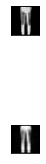

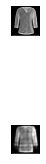

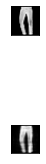

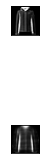

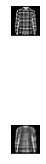

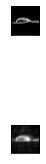

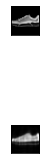

In [ ]:
# Display the original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()